In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
gold = pd.read_csv('/content/gld_price_data.csv')

In [6]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
gold.shape

(2290, 6)

In [8]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [14]:
corr = gold['SPX'].corr(gold['GLD'])
print(corr)

0.04934504087062753


<ipython-input-19-2807b7bb5bdb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

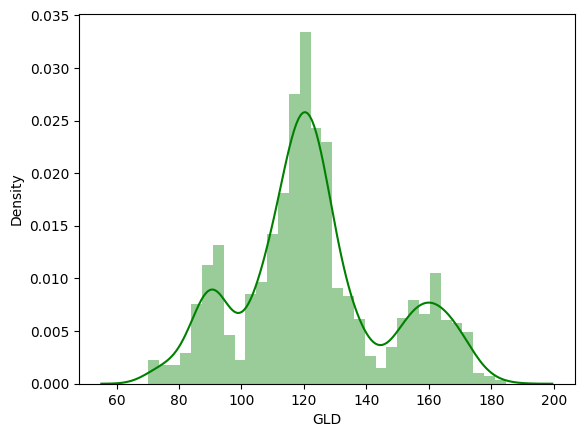

In [19]:
sns.distplot(gold['GLD'],color='green')



In [20]:
X = gold.drop(['Date','GLD'],axis=1)
Y = gold['GLD']

In [21]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [23]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [24]:
regressor = RandomForestRegressor(n_estimators=100)

In [25]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [26]:
test_data_pred = regressor.predict(X_test)

In [27]:
print(test_data_pred)

[168.42219911  82.02359996 115.96410042 127.61600094 120.78650119
 154.85949672 150.73279867 126.17830026 117.37609876 126.05170087
 116.87830106 171.69430103 141.99489874 167.84339851 115.29890025
 117.62300035 139.82990279 170.19320118 158.99910285 160.95390004
 155.2328004  125.25520037 176.4960995  157.4993036  125.23900012
  93.73799958  77.65230014 120.3337001  119.19579991 167.4898999
  88.01930037 125.20029989  90.95690051 117.78760006 121.11669929
 136.71280066 115.50060124 115.09590057 147.85239929 107.35900078
 104.70040215  87.33819791 126.4190003  117.95709997 153.2839989
 119.76119966 108.27720014 108.13989856  93.02890033 127.24619769
  75.45030009 113.75989879 121.38660026 111.33109944 118.70479859
 120.76399928 159.47879935 166.79040161 146.89269663  85.49949838
  94.23980024  86.85149861  90.61689979 118.88300052 126.47960059
 127.59590044 170.19689983 122.24469934 117.30869877  98.24970004
 168.63040048 142.81269828 132.04130271 121.2066021  121.0797993
 119.7189007 

In [28]:
error_score = metrics.r2_score(Y_test,test_data_pred)
print("R squared error : ",error_score)

R squared error :  0.9892412350291808
